In [65]:
import pandas as pd
import numpy as np
import warnings as wr
wr.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [4]:
df.Gender = le.fit_transform(df[['Gender']])

In [5]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [6]:
df.tail()

,Gender,Height,Weight
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405
8554,0,60.921791,131.253738


# Go Ahead

# Least Squared Linear Regression

In [7]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [8]:
X.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [9]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

# Regression Problem

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [34]:
reg = LinearRegression().fit(X_train_scaled, y_train)

In [35]:
print(reg.coef_)

[ 9.46873493 23.00686419]


In [36]:
print(reg.intercept_)

165.73487775241986


In [37]:
y_train_pred = reg.predict(X_train_scaled)
y_test_pred = reg.predict(X_test_scaled)

In [38]:
train_accuracy = r2_score(y_train, y_train_pred)
train_accuracy

0.8981638838242157

In [39]:
test_accuracy = r2_score(y_test, y_test_pred)
test_accuracy

0.9039434520378202

In [40]:
mse_test = mean_squared_error(y_test, y_test_pred)
mse_test

100.0614566314453

In [41]:
w = []
for k in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    w.append(mse)

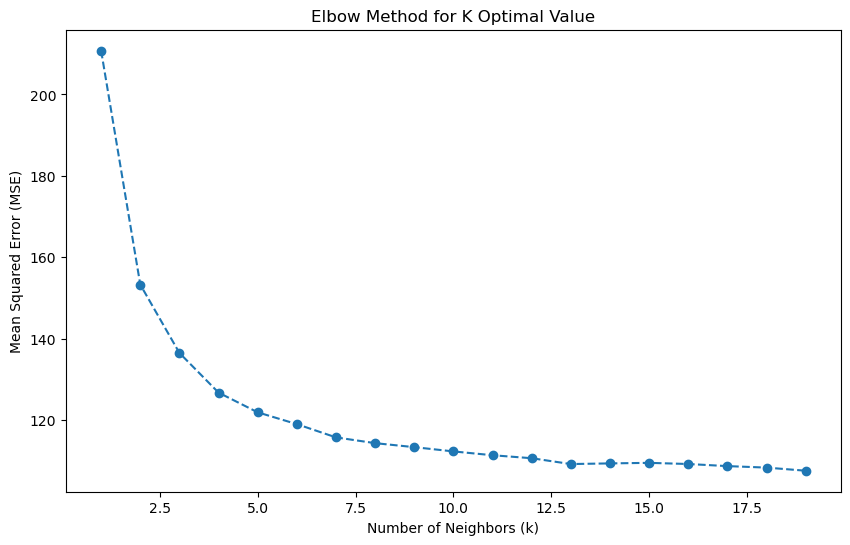

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), w, marker='o', linestyle='--')
plt.title('Elbow Method for K Optimal Value')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

In [42]:
from sklearn.neighbors import KNeighborsRegressor

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [43]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

5988
5988
2567
2567


In [44]:
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=3)

In [45]:
Ytrain_pred = neigh.predict(X_train_scaled)
Ytrain_pred

array([185.02492403, 113.13755723, 115.43559657, ..., 199.19270703,
       177.89285803, 181.85602743])

In [46]:
Ytest_pred = neigh.predict(X_test_scaled)
Ytest_pred

array([146.94459113, 147.304715  , 232.8008306 , ..., 202.5525625 ,
       123.26224357, 140.31675757])

In [47]:
train_acc = r2_score(y_train,Ytrain_pred)
train_acc

0.9300314761702783

In [48]:
test_acc = r2_score(y_test,Ytest_pred)
test_acc

0.8750646645697343

In [50]:
mse_t = mean_squared_error(y_test,Ytest_pred)
mse_t

130.14429430477435

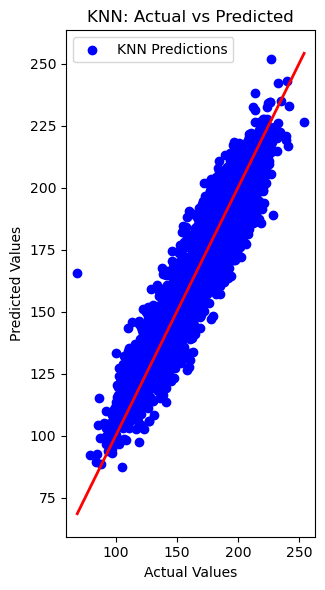

In [60]:
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, Ytest_pred, color='blue', label='KNN Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('KNN: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()

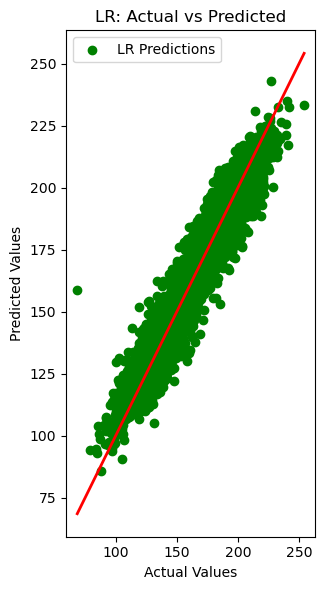

In [59]:
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred, color='green', label='LR Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('LR: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.tight_layout()
plt.show()

# Classification Problem

In [61]:
X = df.drop(columns='Gender') 
Y = df['Gender'] 

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [69]:
st = StandardScaler()
X_trains = st.fit_transform(X_train)
X_tests = st.transform(X_test)

In [70]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_trains, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [71]:
Y_pred = knn.predict(X_tests)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.9002726918582002

In [75]:
from sklearn.metrics import confusion_matrix, f1_score
cm = confusion_matrix(Y_test, Y_pred)
print (cm)
print(f1_score(Y_test, Y_pred))

[[ 948  120]
 [ 136 1363]]
0.9141515761234071
